# DO NOT TOUCH!

In [1]:
from methods.intrinsic_dimension_estimators.pid import estimate
from visualization_generation.plots import *
from models.point_cloud import PointCloud
from methods.tardis import execute
from methods.euclidicity2 import calculate

In [2]:
neighborhood_size=100
maximum_dimension=3
n_steps=5

In [3]:
n = 10000
intrinsic_dimension = 3
r = 1
seed = 1
spatial_dimension = 3

In [4]:
points = sample_from_ball(n, intrinsic_dimension, r, seed, spatial_dimension)

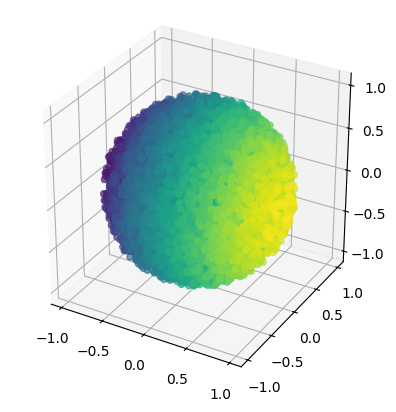

In [5]:
plot_3d(points, True)

In [6]:
point_cloud = PointCloud()
point_cloud.random_constructor(points, 1000)

In [7]:
execute(point_cloud, neighborhood_size, maximum_dimension, n_steps)

In [8]:
data = point_cloud.get_query_points()

In [9]:
c = [query.intrinsic_dimension for query in point_cloud.queries]

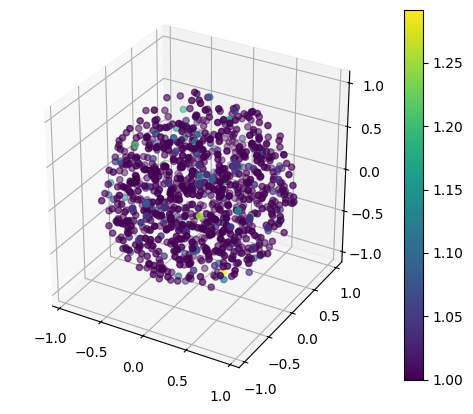

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=c)
fig.colorbar(scatter)
plt.gca().set_aspect('equal')
ax.view_init(elev=None, azim=None)
plt.show()

In [11]:
c = [query.euclidicity for query in point_cloud.queries]

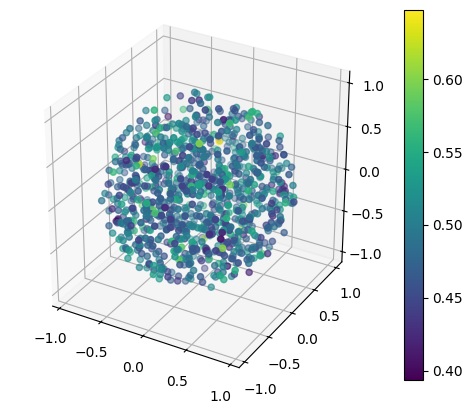

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=c)
fig.colorbar(scatter)
plt.gca().set_aspect('equal')
ax.view_init(elev=None, azim=None)
plt.show()

In [13]:
id_tardis = [query.intrinsic_dimension for query in point_cloud.queries]

In [14]:
eu_tardis = [query.euclidicity for query in point_cloud.queries]

In [15]:
for query in point_cloud.queries:
    query.intrinsic_dimension = 0
    query.euclidicity = 0

In [16]:
deleted = [(query.intrinsic_dimension, query.euclidicity) for query in point_cloud.queries]

In [17]:
np.unique(deleted)

array([0])

In [18]:
estimate(point_cloud, neighborhood_size, maximum_dimension, n_steps)

In [19]:
data = point_cloud.get_query_points()

In [20]:
c = [query.intrinsic_dimension for query in point_cloud.queries]

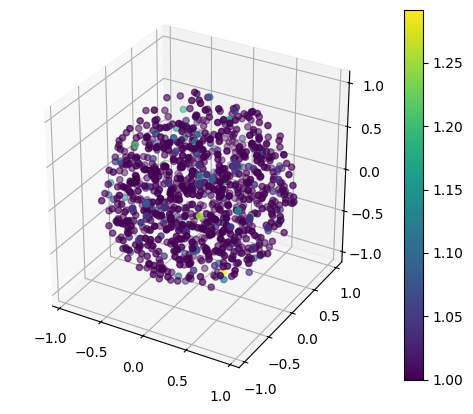

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=c)
fig.colorbar(scatter)
plt.gca().set_aspect('equal')
ax.view_init(elev=None, azim=None)
plt.show()

In [22]:
id_mine = [query.intrinsic_dimension for query in point_cloud.queries]

In [23]:
np.array_equal(id_tardis, id_mine)

True

In [24]:
np.unique(id_tardis, return_counts=True)

(array([1.        , 1.04166667, 1.08333333, 1.125     , 1.16666667,
        1.20833333, 1.25      , 1.29166667]),
 array([843, 106,  32,  10,   5,   2,   1,   1], dtype=int64))

In [25]:
np.unique(id_mine, return_counts=True)

(array([1.        , 1.04166667, 1.08333333, 1.125     , 1.16666667,
        1.20833333, 1.25      , 1.29166667]),
 array([843, 106,  32,  10,   5,   2,   1,   1], dtype=int64))

In [26]:
calculate(point_cloud, neighborhood_size, n_steps)

In [27]:
data = point_cloud.get_query_points()

In [28]:
c = [query.euclidicity for query in point_cloud.queries]

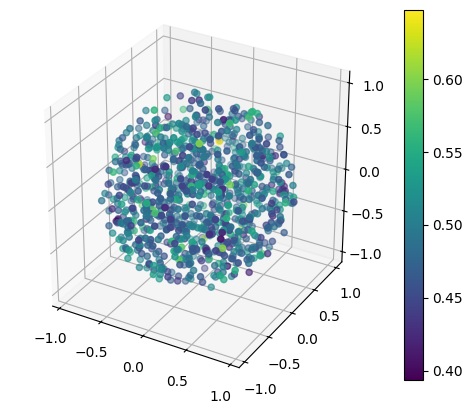

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=c)
fig.colorbar(scatter)
plt.gca().set_aspect('equal')
ax.view_init(elev=None, azim=None)
plt.show()

In [30]:
eu_mine = [query.euclidicity for query in point_cloud.queries]

In [31]:
np.array_equal(eu_tardis, eu_mine)

False

In [32]:
count = 0
for i in range(len(eu_tardis)):
    if eu_tardis[i] != eu_mine[i]:
        str_tardis = str(eu_tardis[i])
        str_mine = str(eu_mine[i])
        max_length = max(len(str_tardis), len(str_mine))
        str_tardis += (max_length - len(str_tardis)) * '0'
        str_mine += (max_length - len(str_mine)) * '0'
        for j in range(len(str_tardis)):
            if str_tardis[j] != str_mine[j]:
                count += 1
                print(i, str_tardis, str_mine, str_tardis[j:], str_mine[j:])
                break
print(count)

1 0.45540375635027880 0.45540375635027885 0 5
6 0.46144296911855530 0.46144296911855537 0 7
9 0.46756234765052790 0.46756234765052795 0 5
14 0.47320933019121480 0.47320933019121486 0 6
16 0.44256314386924100 0.44256314386924106 0 6
18 0.45400293730199330 0.45400293730199337 0 7
20 0.41460967250168320 0.41460967250168324 0 4
22 0.46044344703356420 0.46044344703356427 0 7
30 0.47491006801525750 0.47491006801525754 0 4
34 0.44412605588634800 0.44412605588634807 0 7
35 0.46020522341132160 0.46020522341132164 0 4
39 0.48375248226026690 0.48375248226026696 0 6
41 0.46910623523096240 0.46910623523096245 0 5
42 0.47530494692424930 0.47530494692424935 0 5
43 0.47742056598265960 0.47742056598265964 0 4
48 0.48386693994204200 0.48386693994204205 0 5
51 0.48546637408435340 0.48546637408435345 0 5
55 0.46429954779644800 0.46429954779644805 0 5
57 0.43698749753336110 0.43698749753336114 0 4
60 0.47548698261380190 0.47548698261380196 0 6
61 0.49256849971910310 0.49256849971910316 0 6
62 0.43879258384

In [33]:
# 614
(pow(10, 13) * 0.46396136097609990) // 1

4639613609760.0

In [34]:
(pow(10, 13) * 0.46396136097609997) // 1

4639613609761.0

In [35]:
digits = 12

In [36]:
eu_tardis_trimmed = eu_tardis.copy()
for i in range(len(eu_tardis_trimmed)):
    eu_tardis_trimmed[i] = (pow(10, digits) * eu_tardis_trimmed[i] // 1) / pow(10, digits)

In [37]:
eu_mine_trimmed = eu_mine.copy()
for i in range(len(eu_mine_trimmed)):
    eu_mine_trimmed[i] = (pow(10, digits) * eu_mine_trimmed[i] // 1) / pow(10, digits)

In [38]:
np.array_equal(eu_tardis_trimmed, eu_mine_trimmed)

True

In [39]:
eu_tardis[:5]

[0.4577162017424901,
 0.4554037563502788,
 0.4648527956257264,
 0.5090331124762694,
 0.4698703456670046]

In [40]:
eu_mine[:5]

[0.4577162017424901,
 0.45540375635027885,
 0.4648527956257264,
 0.5090331124762694,
 0.4698703456670046]

In [41]:
eu_tardis_trimmed[:5]

[0.457716201742, 0.45540375635, 0.464852795625, 0.509033112476, 0.469870345667]

In [42]:
eu_mine_trimmed[:5]

[0.457716201742, 0.45540375635, 0.464852795625, 0.509033112476, 0.469870345667]